In [1]:
#Se cargan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Se leen los archivo y se le asigna una variable 
df9 = pd.read_csv('meteo-nogal-09.csv', engine='python')
df9 = df9.drop(df9.index[0]).reset_index(drop=True)
df9 = pd.DataFrame(df9)

df10 = pd.read_csv('soil-nogal-09.csv', engine='python')
df10 = df10.drop(df10.index[0]).reset_index(drop=True)
df10 = pd.DataFrame(df10)

In [3]:
df1 = df10[['2 Year_RTM  L', '3 Day_RTM  L', '4 Hour_Minute_RTM  L','Tsuelo_10cm', 'Tsuelo_20cm', 'Tsuelo_40cm', 'Tsuelo_85cm', 'Tsuelo_100cm']].copy()
df1['3 Day_RTM  L'] = pd.to_datetime(df1["3 Day_RTM  L"], format='%j').dt.strftime('%m-%d')

df2 = df9[['DATE', 'TIME', 'airT_Avg']].copy()

In [4]:
df1['4 Hour_Minute_RTM  L'] = df1['4 Hour_Minute_RTM  L'].astype(str).replace(regex={r"00$":r":00" , r"30$":r":30"})
df1['4 Hour_Minute_RTM  L'] = df1['4 Hour_Minute_RTM  L'].astype(str).replace(regex={r"^:30":r"0:30" , r"24:00":r"00:00:01"})

df1['2 Year_RTM  L'] = df1['2 Year_RTM  L'].astype('str') 
df1["date"] = df1["2 Year_RTM  L"] + "-" + df1["3 Day_RTM  L"] + " " + df1["4 Hour_Minute_RTM  L"]
df1['date'] = df1["date"].astype('datetime64[ns]')

df1.drop(['4 Hour_Minute_RTM  L', '2 Year_RTM  L', '3 Day_RTM  L'], axis=1, inplace=True)

In [5]:
#df2 ['TIME'] = df2['TIME'].astype(str).replace(regex={r"00:00:00":r"23:59:59"})
df2 ['date'] = df2["DATE"] + " " + df2["TIME"]
#df2 ['date'] = df2['date'].astype('datetime64[ns]')
df2.drop(['DATE', 'TIME'], axis=1, inplace=True)

In [6]:
df2["date"] = df2["date"].astype(str).replace(regex={r"00:00:00$":r"00:00:01"})
df2['date'] = df2["date"].astype('datetime64[ns]')
df2['airT_Avg'] = df2['airT_Avg'].apply(pd.to_numeric, errors='coerce')
df0 = pd.merge(df1, df2, on='date')
df0 = df0.set_index('date')


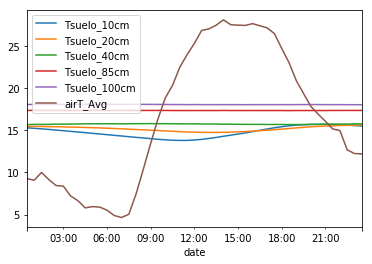

In [7]:
#Primera gráfica seleccionando un día de enero
df = df0.loc['2009-01-14 00:00:00':'2009-01-14 23:59:59']
#suavizando
#dfp = pd.DataFrame()
#dfp['t10'] = df.Tsuelo_10cm.rolling(200).mean()
#dfp['t20'] = df.Tsuelo_20cm.rolling(200).mean()
#dfp['t40'] = df.Tsuelo_40cm.rolling(200).mean()
#dfp['t85'] = df.Tsuelo_85cm.rolling(200).mean()
#dfp['T100'] = df.Tsuelo_100cm.rolling(200).mean()
#dfp['airT_avg'] = df.airT_Avg.rolling(200).mean()

#Grafica normal
df.reset_index().plot(x="date",y=["Tsuelo_10cm",'Tsuelo_20cm','Tsuelo_40cm','Tsuelo_85cm','Tsuelo_100cm', 'airT_Avg'])



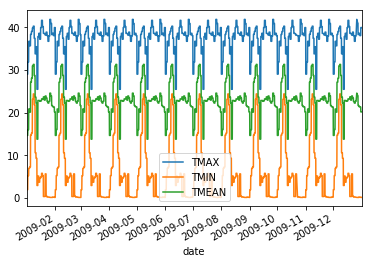

In [8]:
df = df0
df['date'] = df.index
df['DIA'] = df['date'].dt.day
df["TMAX"]=df.groupby(["DIA"])["airT_Avg"].transform('max')
df["TMEAN"]=df.groupby(['DIA'])["airT_Avg"].transform("mean")
df["TMIN"]=df.groupby(["DIA"])["airT_Avg"].transform("min")

#suavizando 
dfe = pd.DataFrame()
dfe["TMIN"]=df.TMIN.rolling(200).mean()
dfe["TMAX"]=df.TMAX.rolling(200).mean()
dfe["TMEAN"]=df.TMEAN.rolling(200).mean()
df.plot(x="date",y=['TMAX','TMIN','TMEAN'])

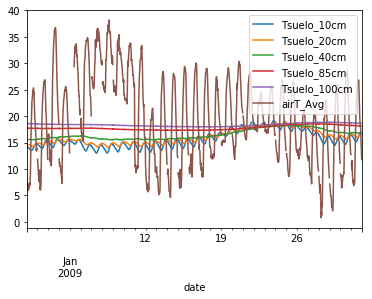

In [9]:
#Se saca el promedio de cada media hora de los valores durante el mes de enero y se observa su variación 
df = df.groupby(pd.Grouper(key='date', freq='30min')).mean()
df = df.loc['2009-01-01 00:00:00':'2009-01-31 23:59:59']

#suavizando
#dfq = pd.DataFrame()
#dfq['t10'] = df.Tsuelo_10cm.rolling(200).mean()
#dfq['t20'] = df.Tsuelo_20cm.rolling(200).mean()
#dfq['t40'] = df.Tsuelo_40cm.rolling(200).mean()
#dfq['t85'] = df.Tsuelo_85cm.rolling(200).mean()
#dfq['T100'] = df.Tsuelo_100cm.rolling(200).mean()
#dfq['airT_avg'] = df.airT_Avg.rolling(200).mean()

#graficando
df.reset_index().plot(x="date",y=["Tsuelo_10cm",'Tsuelo_20cm','Tsuelo_40cm','Tsuelo_85cm','Tsuelo_100cm', 'airT_Avg'])



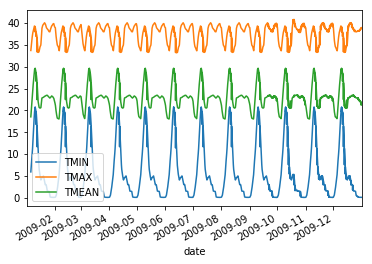

In [10]:
#grafica suavizada de la 2º tabla pedida
dfe.plot(y=['TMIN','TMAX','TMEAN'])